In [1]:
##### DNN module

from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.optimizers import RMSprop, Adagrad, Adam
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l1, l2, l1_l2

#from sklearn.model_selection import train_test_split
#from keras import backend as K
#from keras.applications import ResNet50

Using TensorFlow backend.


In [2]:
#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
##### Common moldule

import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import time
from PIL import Image
from scipy.interpolate import RegularGridInterpolator
import pandas as pd

In [4]:
##### Control Panel

fn_serial   = '015'
batch_size  = 64
num_classes = 5
epochs      = 60
pic_size    = 120
l1_ratio    = 1e-8
Conv2D_size = (5, 5)
pool_size   = (2, 2)
optimize_lr = 1e-3

In [5]:
##### Model Sequential Layer

model = Sequential()
model.add(Conv2D(32, Conv2D_size, padding='same', input_shape=(pic_size, pic_size, 3), kernel_regularizer=l1(l1_ratio)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=pool_size))
#model.add(Dropout(0.1))

model.add(Conv2D(128, Conv2D_size, padding='same', kernel_regularizer=l1(l1_ratio)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=pool_size))
#model.add(Dropout(0.1))

model.add(Conv2D(64, Conv2D_size, padding='same', kernel_regularizer=l1(l1_ratio)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=pool_size))
#model.add(Dropout(0.1))

model.add(Conv2D(32, Conv2D_size, padding='same', kernel_regularizer=l1(l1_ratio)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=pool_size))
#model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, kernel_regularizer=l1(l1_ratio)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 120, 120, 32)      2432      
_________________________________________________________________
activation_1 (Activation)    (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       102528    
_________________________________________________________________
activation_2 (Activation)    (None, 60, 60, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 64)       

In [6]:
##### Model Compile

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=optimize_lr),
              metrics=['accuracy'])

In [7]:
##### ImageDataGenerator

augment_generator = ImageDataGenerator(
                                       rotation_range=20,
                                       rescale=1./255,
                                       #featurewise_center=True,
                                       #featurewise_std_normalization=True,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip=True,
                                       #data_format='channels_last'
                                      )

In [8]:
##### Generator for train and validation

train_generator = augment_generator.flow_from_directory('database/image_data/sep_train',
                                                        target_size=(pic_size, pic_size),
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        )

valid_generator = augment_generator.flow_from_directory('database/image_data/sep_valid',
                                                        target_size=(pic_size, pic_size),
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        )

Found 2323 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [9]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 120, 120, 3)
labels batch shape: (64, 5)


In [10]:
train_sample = train_generator.samples
valid_sample = valid_generator.samples

In [11]:
history = model.fit(train_generator,
                    steps_per_epoch=int(train_sample/batch_size),
                    epochs=epochs,
                    verbose=1,
                    validation_data=valid_generator,
                    validation_steps=int(valid_sample/batch_size))

Epoch 1/60
36/36 [==============================] - 11s 304ms/step - loss: 1.4461 - accuracy: 0.3541 - val_loss: 1.3494 - val_accuracy: 0.4129
Epoch 2/60
36/36 [==============================] - 12s 324ms/step - loss: 1.2755 - accuracy: 0.4781 - val_loss: 1.2981 - val_accuracy: 0.4312
Epoch 3/60
36/36 [==============================] - 10s 288ms/step - loss: 1.1850 - accuracy: 0.5069 - val_loss: 1.2327 - val_accuracy: 0.4243
Epoch 4/60
36/36 [==============================] - 11s 310ms/step - loss: 1.0724 - accuracy: 0.5694 - val_loss: 1.1052 - val_accuracy: 0.4495
Epoch 5/60
36/36 [==============================] - 9s 264ms/step - loss: 1.0824 - accuracy: 0.5632 - val_loss: 1.2064 - val_accuracy: 0.5459
Epoch 6/60
36/36 [==============================] - 10s 288ms/step - loss: 0.9928 - accuracy: 0.6055 - val_loss: 1.1293 - val_accuracy: 0.5413
Epoch 7/60
36/36 [==============================] - 11s 314ms/step - loss: 0.9447 - accuracy: 0.6350 - val_loss: 1.0327 - val_accuracy: 0.5505


36/36 [==============================] - 12s 337ms/step - loss: 0.3661 - accuracy: 0.8582 - val_loss: 0.7852 - val_accuracy: 0.6560
Epoch 59/60
36/36 [==============================] - 10s 275ms/step - loss: 0.3506 - accuracy: 0.8607 - val_loss: 0.8236 - val_accuracy: 0.7523
Epoch 60/60
36/36 [==============================] - 9s 260ms/step - loss: 0.4245 - accuracy: 0.8369 - val_loss: 1.2513 - val_accuracy: 0.7087


In [12]:
model.save(f'model/STD_datagen_0101_{fn_serial}-100eps-2.h5')

In [13]:
##### Test on unknown sample

In [14]:
path_unknown = glob.glob('database/image_data/test/*')
path_unknown[:5]

['database/image_data/test\\0028624c49b3e0610ff9f1d111f5d532.jpg',
 'database/image_data/test\\002c30700185b7971369258b438070d5.jpg',
 'database/image_data/test\\00852f4f666acecd0c0d140365b42efd.jpg',
 'database/image_data/test\\00c08828fce04e360c732cac01edad9e.jpg',
 'database/image_data/test\\00d366e7877b6a78b104b57d67b60e6b.jpg']

In [15]:
def resampleRGI3d(input_mx, resize_to, dtype='float32'):
    # Ref: 10 3-A-7
    # Ver. 2.1
    # input_mx : numpy array, the original target matrix
    # resize_to: list or tuple with 3 int inside
    a, b, c = np.shape(input_mx)
    p, q, r = resize_to
    z_grid = np.linspace(0, p - 1, a)
    y_grid = np.linspace(0, q - 1, b)
    x_grid = np.linspace(0, r - 1, c)
    RGI = RegularGridInterpolator((z_grid, y_grid, x_grid), input_mx)
    z_grid_t2 = np.arange(p)
    y_grid_t2 = np.arange(q)
    x_grid_t2 = np.arange(r)
    meshgrid_para = np.meshgrid(z_grid_t2, y_grid_t2, x_grid_t2)
    RGI_mesh_mx = RGI((meshgrid_para[0], meshgrid_para[1], meshgrid_para[2]))
    RGI_mx = np.transpose(RGI_mesh_mx, axes=[1, 0, 2]).astype(dtype)
    return RGI_mx

def happy_time(start,stop):
    process_time = round(stop - start)
    ss = process_time % 60
    mm = process_time // 60 % 60
    hh = process_time // 3600
    duration = "Process time == {}s == {}H {}m {}s".format(process_time,hh,mm,ss)
    return duration

In [16]:

id_li = []
flower_class = []
loop_start = time.time()

for j in range(len(path_unknown)):
    serial = os.path.basename(path_unknown[j])[:-4]
    temp_pic = np.asarray(Image.open(path_unknown[j]))
    temp_pic = resampleRGI3d(temp_pic, (pic_size, pic_size, 3))
    temp_shape = np.shape(temp_pic)
    temp_pic = np.expand_dims(temp_pic, axis = 0)
    pred = model.predict(temp_pic)[0]
    id_li.append(serial)
    flower_class.append(list(pred).index(max(pred)))
    if (j+1) % 200 == 0:
        print(j+1, 'files done.', happy_time(loop_start, time.time()))

200 files done. Process time == 3s == 0H 0m 3s
400 files done. Process time == 6s == 0H 0m 6s
600 files done. Process time == 9s == 0H 0m 9s
800 files done. Process time == 12s == 0H 0m 12s
1000 files done. Process time == 15s == 0H 0m 15s
1200 files done. Process time == 18s == 0H 0m 18s
1400 files done. Process time == 21s == 0H 0m 21s
1600 files done. Process time == 24s == 0H 0m 24s
1800 files done. Process time == 27s == 0H 0m 27s
2000 files done. Process time == 30s == 0H 0m 30s


In [17]:
pred_result_df = pd.DataFrame(columns=['id', 'flower_class'])
pred_result_df['id'] = id_li
pred_result_df['flower_class'] = flower_class
pred_result_df

,id,flower_class
0,0028624c49b3e0610ff9f1d111f5d532,2
1,002c30700185b7971369258b438070d5,0
2,00852f4f666acecd0c0d140365b42efd,4
3,00c08828fce04e360c732cac01edad9e,4
4,00d366e7877b6a78b104b57d67b60e6b,4
...,...,...
1995,ff7eac29b6d7a33fbd8009677c3e9c58,3
1996,ffbc32a7b67dfe72b8d35d4b1b35fd6c,3
1997,ffea1f275c05accb0a6bfd1203620c7e,0
1998,ffeb2a1cf53464b6af937ab8af0c2946,3


In [18]:
pred_result_df['flower_class'].value_counts().sort_index()


#50eps
#0    490
#1    139
#2    264
#3    696
#4    411
#Name: flower_class, dtype: int64

0    492
1     38
2    144
3    697
4    629
Name: flower_class, dtype: int64

In [19]:
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

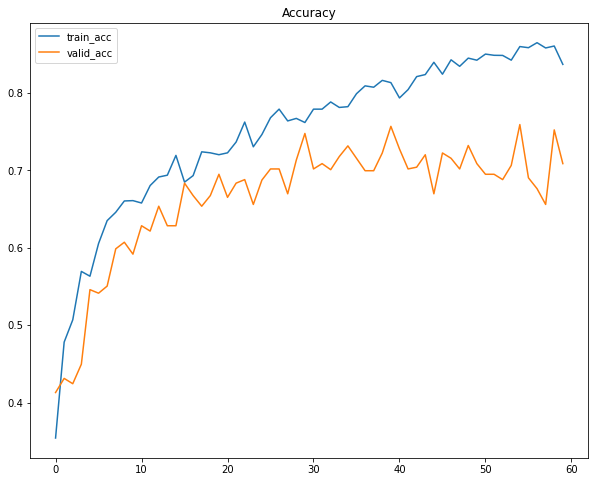

In [20]:
plt.figure(figsize=(10,8))
plt.title('Accuracy')
plt.plot(train_acc, label = 'train_acc')
plt.plot(valid_acc, label = 'valid_acc')
plt.legend()
plt.show()

In [21]:
pred_result_df.to_csv(f'model/pred_result_STD_datagen_0101_{fn_serial}-100eps-2.csv', index=False)

In [22]:
#####
#####
#####

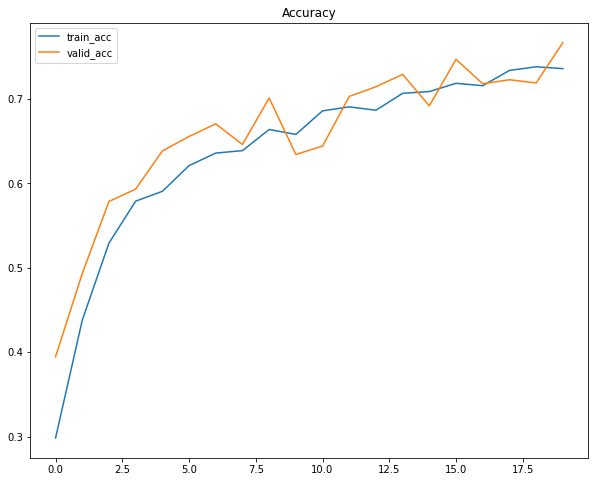

In [30]:
plt.figure(figsize=(10,8))
plt.title('Accuracy')
plt.plot(train_acc, label = 'train_acc')
plt.plot(valid_acc, label = 'valid_acc')
plt.legend()
plt.show()

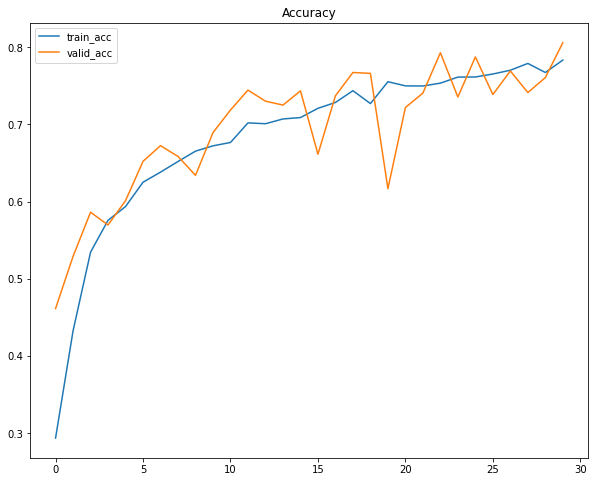

In [24]:
plt.figure(figsize=(10,8))
plt.title('Accuracy')
plt.plot(train_acc, label = 'train_acc')
plt.plot(valid_acc, label = 'valid_acc')
plt.legend()
plt.show()

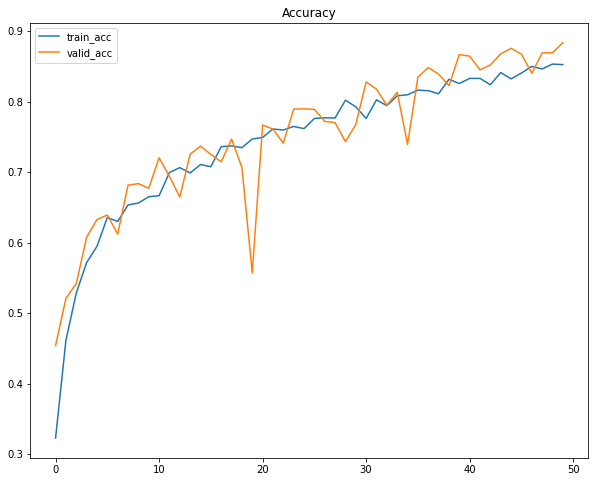

In [24]:
plt.figure(figsize=(10,8))
plt.title('Accuracy')
plt.plot(train_acc, label = 'train_acc')
plt.plot(valid_acc, label = 'valid_acc')
plt.legend()
plt.show()

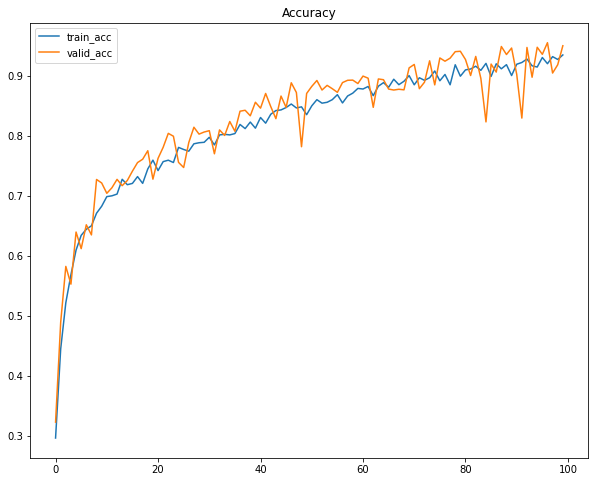

In [22]:
plt.figure(figsize=(10,8))
plt.title('Accuracy')
plt.plot(train_acc, label = 'train_acc')
plt.plot(valid_acc, label = 'valid_acc')
plt.legend()
plt.show()

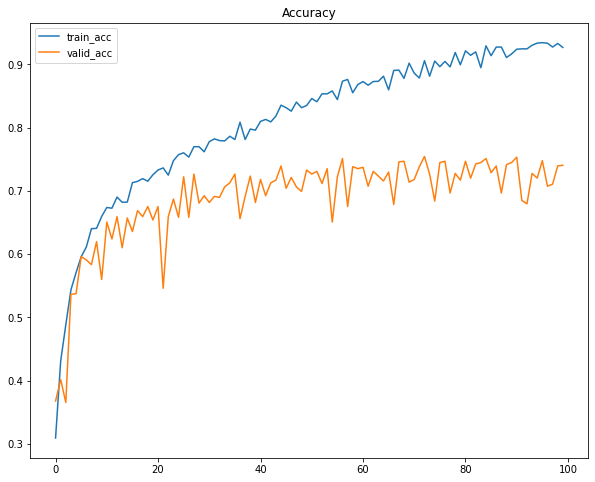

In [24]:
plt.figure(figsize=(10,8))
plt.title('Accuracy')
plt.plot(train_acc, label = 'train_acc')
plt.plot(valid_acc, label = 'valid_acc')
plt.legend()
plt.show()

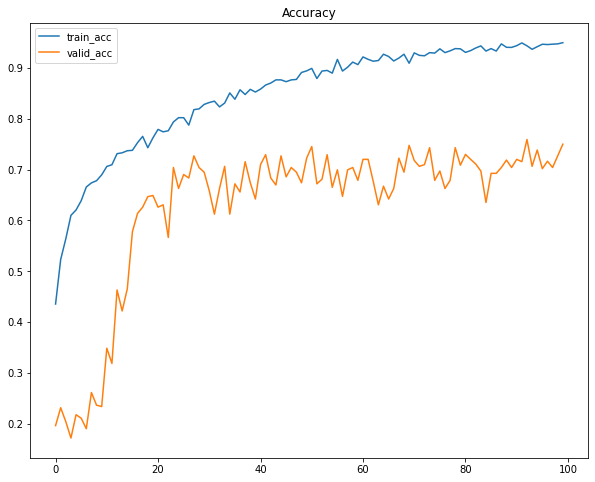

In [19]:
##### Batch Normalization

plt.figure(figsize=(10,8))
plt.title('Accuracy')
plt.plot(train_acc, label = 'train_acc')
plt.plot(valid_acc, label = 'valid_acc')
plt.legend()
plt.show()

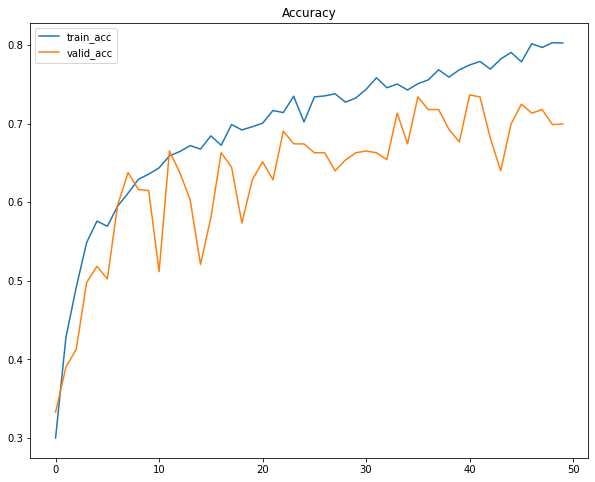

In [20]:
##### conv2d size = 3

plt.figure(figsize=(10,8))
plt.title('Accuracy')
plt.plot(train_acc, label = 'train_acc')
plt.plot(valid_acc, label = 'valid_acc')
plt.legend()
plt.show()